<a href="https://www.kaggle.com/code/ksenia5/nltk-categorising-and-tagging-words?scriptVersionId=112415282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NLTK Chapter 5: Categorising and Tagging Words

This notebooks follows the introductory text to **Natural Language Processing** (NLP) and explores methods for **Categorizing and Tagging Words** as described in Chapter 5 of the [NLTK book](https://www.nltk.org/book/ch05.html).
<br><br>

The aim is to become familiar with **categorising and tagging words**, a **key step in the NLP pipeline**.
<br><br>

The first three chapters of the book were covered in a different notebeook [Natural Language TookKit: Getting Started](https://www.kaggle.com/code/ksenia5/natural-language-toolkit-getting-started).

In [1]:
# Language resources from NLTK
import nltk # library
from nltk.corpus import brown
nltk.download(["punkt",'averaged_perceptron_tagger','universal_tagset'])

# Data processing and visualisation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
# To display image use code
# Image("tag.png")

# Pandas and print rounding
pd.set_option('precision', 3) 
%precision 3

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


/kaggle/input/universal-tagset/universal-tagset.png


#### Part-of-speech (POS) tagging

POS tagging is the process of **classifying and labelling words in a text into their parts of speech** - noun, adjective, determinant, etc..

##### Tagging is typically the **second step in the NLP pipeline**, following tokenisation.

##### The Universal tagset shown below is a simplified POS tagset; other NLTK tagsets include wsj and brown.

- NOUN (nouns)
- VERB (verbs)
- ADJ (adjectives)
- ADV (adverbs)
- PRON (pronouns)
- DET (determiners and articles)
- ADP (prepositions and postpositions)
- NUM (numerals)
- CONJ (conjunctions)
- PRT (particles)
- . (punctuation marks)
- X (a catch-all for other categories such as abbreviations or foreign words) 

In [2]:
# See documentation for a given tagset
nltk.help.upenn_tagset('RB')
# nltk.help.upenn_tagset('PRP')

# To see all noun tags
nltk.help.upenn_tagset('NN.*')

#nltk.help.brown_tagset()

# Some tagged corpora have README files with tagset documentation
#nltk.corpus.brown.readme() 

# To see methods available for the tagged dataset
#help(brown.tagged_words())


RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions mu

#### See the most common tags in the news category of the Brown corpus.

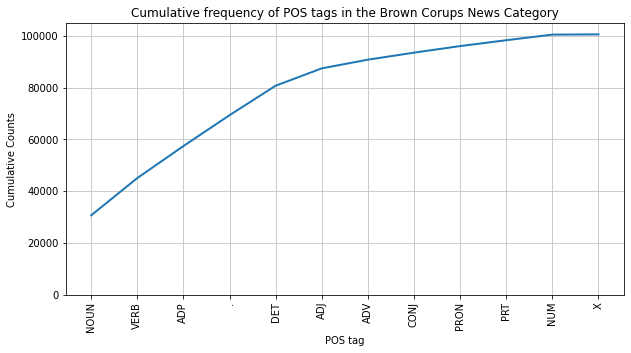

The top five most common parts of speech are: ['NOUN', 'VERB', 'ADP', '.', 'DET']. 
These make up 75.1% of the words.


In [3]:
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

# Plot POS frequency
plt.figure(figsize=(10,5))
ax = tag_fd.plot(cumulative=True, show = False, 
                 title = "Cumulative frequency of POS tags in the Brown Corups News Category") # Check how to change y-axis range
ax.set_ylim(0,105000)
ax.set_xlabel("POS tag")
plt.show()
#help(tag_fd.plot())

# Calculate the number of words due to the top 5 parts of speech
n_top5_tags = 0
for i in range(5):
    key = list(tag_fd.keys())[i]
    n_top5_tags += tag_fd[key] 

# Total number of words
n_words = len(brown_news_tagged)

# Proportion top 5 as percentage
n_top5_pc = 100*n_top5_tags/n_words

print("The top five most common parts of speech are: {}. \n\
These make up {:.1f}% of the words.".format([tag for (tag,freq) in tag_fd.most_common(5)],n_top5_pc))


Find words within the brown corpus that are past participles (VBD).

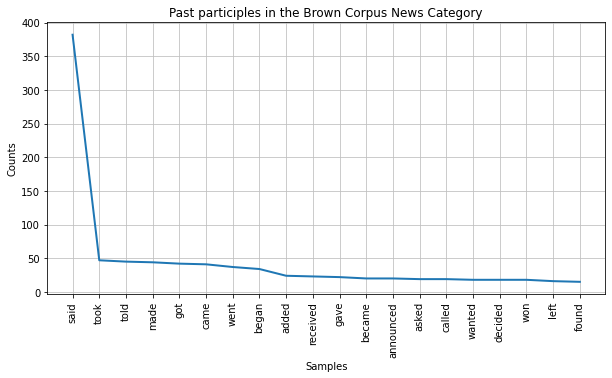

There are 667 past participle words in the brown corpus used a total of 2524 times.

The most frequent past partciples are: 
[('said', 382), ('took', 47), ('told', 45), ('made', 44), ('got', 42), ('came', 41), ('went', 37), ('began', 34), ('added', 24), ('received', 23), ('gave', 22), ('became', 20), ('announced', 20), ('asked', 19), ('called', 19)]


In [4]:
# tagged_words() uses WSJ tagset by default
brown_news_tagged = brown.tagged_words(categories='news')

# Create a conditional frequency distribution
tag_cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in brown_news_tagged)

#print(tag_cfd.conditions())

# Count the number of times past particple is used
pp_count = len([word for (word, tag) in brown_news_tagged if tag == "VBD"])

# List of past participles in the news category of Brown corpus
pp_brown_cfd = tag_cfd['VBD']

plt.figure(figsize=(10,5))
ax = pp_brown_cfd.plot(20, cumulative = False, title = "Past participles in the Brown Corpus News Category")
plt.show()

# Make a list of past participles
pp_list = list(pp_brown_cfd)

print("There are {} past participle words in the brown corpus used a total of {} times.\n".format(len(pp_brown_cfd),pp_count))
print("The most frequent past partciples are: ")
print([word for word in list(tag_cfd['VBD'].most_common(15))])


#### Given a list of past participles, collect a list of all the word-tag pairs that immediately precede items in that list.

In [5]:
# Create a list of bigrams, first converting text to lowercase
lower_brown_news_tagged = [(w.lower(),t) for (w,t) in brown_news_tagged]
word_tag_pairs = nltk.bigrams(lower_brown_news_tagged)

# Make a list of precendents of past participles
pp_preceders = [a[0] for (a, b) in word_tag_pairs if b[0] in pp_list and b[1] == "VBD"] 

print("Some of the words that precede past participles: \n",pp_preceders[:15])

# This following code only returns the precedent of the first occurrence of the past participle
'''
n_cases = 0
for word in pp_list:
    index = brown_news_tagged.index((word,'VBD'))
    if n_cases < 20:
        print(brown_news_tagged[index-1:index+1])
    n_cases += 1
n_cases
'''

Some of the words that precede past participles: 
 ['jury', 'election', 'irregularities', 'further', 'jury', 'jury', 'it', 'jury', 'it', 'jury', 'jury', 'it', 'it', 'jury', 'jury']


"\nn_cases = 0\nfor word in pp_list:\n    index = brown_news_tagged.index((word,'VBD'))\n    if n_cases < 20:\n        print(brown_news_tagged[index-1:index+1])\n    n_cases += 1\nn_cases\n"

### Automatic Tagging

The NLTK automatic tagger function: **pos_tag**(*tokenised text*). Tag POS at the sentence level, as POS is context dependent. 

#### Q.5.1
Search the web for "spoof newspaper headlines", to find such gems as: British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

##### Tag a sentence where a word is used as two different parts of speech.

In [6]:
sent2 = "To act in the second act straight after the first must be tough!"
sent2_tokens = nltk.word_tokenize(sent2)
nltk.pos_tag(sent2_tokens)
#help(nltk.pos_tag)

[('To', 'TO'),
 ('act', 'VB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('second', 'JJ'),
 ('act', 'NN'),
 ('straight', 'RB'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('must', 'MD'),
 ('be', 'VB'),
 ('tough', 'JJ'),
 ('!', '.')]

The POS tagger correctly identifies the differents parts of speech of the word *act* - noun and verb.


#### 5.3
Tokenize and tag the following sentence: *They wind back the clock, while we chase after the wind.* 
* What different pronunciations and parts of speech are involved?



In [7]:
sent1 = "They wind back the clock, while we chase after the wind."
sent1_tokens = nltk.word_tokenize(sent1)
nltk.pos_tag(sent1_tokens)

[('They', 'PRP'),
 ('wind', 'VBP'),
 ('back', 'RB'),
 ('the', 'DT'),
 ('clock', 'NN'),
 (',', ','),
 ('while', 'IN'),
 ('we', 'PRP'),
 ('chase', 'VBP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('wind', 'NN'),
 ('.', '.')]

The word *wind* is used as a verb (VBP) and as a noun (NN).

### Building an automatic tagger
* Start with the default tagger that assigns the same POS tag to all parts of speech.
* This establishes a baseline.
* After a lot of text has been processed, the new unseen words will be nouns.

In [8]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(brown_sents[0]))

# To evaluate the accuracy of the tagger
default_tagger.accuracy(brown_tagged_sents)

[('The', 'NN'), ('Fulton', 'NN'), ('County', 'NN'), ('Grand', 'NN'), ('Jury', 'NN'), ('said', 'NN'), ('Friday', 'NN'), ('an', 'NN'), ('investigation', 'NN'), ('of', 'NN'), ("Atlanta's", 'NN'), ('recent', 'NN'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'NN'), ('``', 'NN'), ('no', 'NN'), ('evidence', 'NN'), ("''", 'NN'), ('that', 'NN'), ('any', 'NN'), ('irregularities', 'NN'), ('took', 'NN'), ('place', 'NN'), ('.', 'NN')]


0.131

The default tagger is 13.1% accurate.

#### Regular Expression Tagger

In [9]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'([Tt]he$)|([Aa]n?$)', 'AT'),   # determinants
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]

# make a function for regex tagger
regexp_tagger = nltk.RegexpTagger(patterns)
# apply that function 
# remember that tokens is untagged brown words

print(regexp_tagger.tag(brown_sents[0]))

[('The', 'AT'), ('Fulton', 'NN'), ('County', 'NN'), ('Grand', 'NN'), ('Jury', 'NN'), ('said', 'NN'), ('Friday', 'NN'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'NN'), ("Atlanta's", 'NN$'), ('recent', 'NN'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', 'NN'), ('no', 'NN'), ('evidence', 'NN'), ("''", 'NN'), ('that', 'NN'), ('any', 'NN'), ('irregularities', 'VBZ'), ('took', 'NN'), ('place', 'NN'), ('.', 'NN')]


In [10]:
##evaluate how well the tagger words against a known sets
regexp_tagger.accuracy(brown_tagged_sents)

0.290

The regex tagger is 29.0% accurate, higher than the default tagger, and can be improved by defining additional patterns.
### Lookup Tagger
Uses a dictionary of word:POS key:value pairs.

In [11]:
##create a frequency distribution of the target word set
fd = nltk.FreqDist(brown.words(categories='news'))

# pull out the top 100 words
most_freq_words = fd.most_common(100)

# create a conditional frequency distribution of the word-pos for wordset
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

# Pull out most frequently occurring tag for each word in top 100 word list
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
print(likely_tags)

{'the': 'AT', ',': ',', '.': '.', 'of': 'IN', 'and': 'CC', 'to': 'TO', 'a': 'AT', 'in': 'IN', 'for': 'IN', 'The': 'AT', 'that': 'CS', '``': '``', 'is': 'BEZ', 'was': 'BEDZ', "''": "''", 'on': 'IN', 'at': 'IN', 'with': 'IN', 'be': 'BE', 'by': 'IN', 'as': 'CS', 'he': 'PPS', 'said': 'VBD', 'his': 'PP$', 'will': 'MD', 'it': 'PPS', 'from': 'IN', 'are': 'BER', ';': '.', 'an': 'AT', 'has': 'HVZ', '--': '--', 'had': 'HVD', 'who': 'WPS', 'have': 'HV', 'not': '*', 'Mrs.': 'NP', 'were': 'BED', 'this': 'DT', 'which': 'WDT', 'would': 'MD', 'their': 'PP$', 'been': 'BEN', 'they': 'PPSS', 'He': 'PPS', 'one': 'CD', 'I': 'PPSS', 'but': 'CC', 'its': 'PP$', 'or': 'CC', ')': ')', 'more': 'AP', 'Mr.': 'NP', '(': '(', 'up': 'RP', 'all': 'ABN', 'out': 'RP', 'last': 'AP', 'two': 'CD', 'other': 'AP', ':': ':', 'new': 'JJ', 'first': 'OD', 'than': 'IN', 'year': 'NN', 'A': 'AT', 'about': 'IN', 'there': 'EX', 'when': 'WRB', 'home': 'NN', 'after': 'IN', 'In': 'IN', 'also': 'RB', 'It': 'PPS', 'over': 'IN', 'into': 'I

In [12]:
# create the baseline_tagger function using the likely words model
# and backoff to tag all other words NN
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

# examine how well it tags versus the known words
baseline_tagger.accuracy(brown_tagged_sents)

0.582

This lookup tagger has an accuracy of 58.2% which can be further improved by increasing the size of the lookup dictionary (e.g. 72.5% using 1000 most frequent words).

### Unigram Tagger
Picks the most freqent POS tag for a given word.
* Allows for training and testing, which require train and test split.

#### 5.10
#### Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [13]:
# Tagged data from the Brown corpus, news category
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

# Train test split tagged data, 90:10 ratio
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

# create a unigram tagger
unigram_tagger = nltk.UnigramTagger(train_sents)

# Tag example
unigram_tagger.tag(brown_sents[1])

# Evaluate performance
unigram_tagger.accuracy(test_sents)

0.812

The Unigram tagger trained on news text is 81.2% accurate on previously unseen news text.

In [14]:
# applying the tagger trained above on each category in Brown Corpus
for category in nltk.corpus.brown.categories():
    tagged_sents = brown.tagged_sents(categories=category)
    sents = brown.sents(categories=category)
    
    # Evaluate performance
    acc = unigram_tagger.accuracy(tagged_sents)
    print("Tagger is {:.1f}% accurate for {}.".format(100*acc,category))

Tagger is 78.3% accurate for adventure.
Tagger is 79.2% accurate for belles_lettres.
Tagger is 80.8% accurate for editorial.
Tagger is 79.5% accurate for fiction.
Tagger is 80.2% accurate for government.
Tagger is 76.5% accurate for hobbies.
Tagger is 79.0% accurate for humor.
Tagger is 76.7% accurate for learned.
Tagger is 79.1% accurate for lore.
Tagger is 80.4% accurate for mystery.
Tagger is 92.3% accurate for news.
Tagger is 79.0% accurate for religion.
Tagger is 76.7% accurate for reviews.
Tagger is 80.5% accurate for romance.
Tagger is 79.4% accurate for science_fiction.


As the unigram tagger was trained on the news genre,unsurprisingly its accuracy is highest - 92.3% for this genre. For other genres it performs less well, as it encounters words not seen previously.

In [15]:
print(unigram_tagger.tag(brown_sents[1]))

[('The', 'AT'), ('jury', 'NN'), ('further', 'JJR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'NN-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN'), ('Atlanta', 'NP'), ("''", "''"), ('for', 'IN'), ('the', 'AT'), ('manner', 'NN'), ('in', 'IN'), ('which', 'WDT'), ('the', 'AT'), ('election', 'NN'), ('was', 'BEDZ'), ('conducted', 'VBN'), ('.', '.')]


The tagger assigns the *None* tag to words not seen previously, as for *fancying* above.

#### 5.11
##### Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger and run it on some new text. 
Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [16]:
# Define mim and max affix length values
aff_len_min = -5
aff_len_max = 6

# Define mim and max word (stem) length values
word_len_min = 0
word_len_max = 10

affix_len = np.arange(aff_len_min,aff_len_max,1)
word_len = np.arange(word_len_min,word_len_max,1)

# Create dataframe to store accuracy ratings for the affix tagger
#initialising values to float values of -1.0
accuracy_score_df = pd.DataFrame(float(-1),columns = affix_len, index = word_len)
#accuracy_score_df

In [17]:
#help(nltk.AffixTagger)

# For each value of affix and word length, train tagger and measure accuracy
for i in range(aff_len_min,aff_len_max):
    for j in range(word_len_min,word_len_max):
        # create a unigram tagger
        affix_tagger = nltk.AffixTagger(train_sents,affix_length=i, min_stem_length=j)

        # Evaluate performance
        accuracy_score_df.iloc[j][i] = affix_tagger.accuracy(test_sents)
        
# columns are affix lengths
# rows are minimum word length (stem) lengths
# accuracy_score_df

[Text(0.5, 33.0, 'Affix length'), Text(87.0, 0.5, 'Word length')]

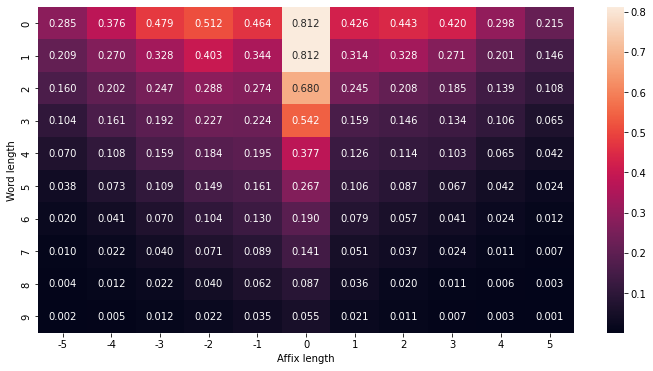

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data = accuracy_score_df, annot=True, fmt=".3f")
ax.set(xlabel="Affix length", ylabel="Word length")

* The accuracy heat map shows that the affix tagger is most accurate (81.2%) when affix length is zero and the minimum root length is 0-1, this corresponds to the unigram tagger as the affix/suffix is not taken into consideration.
* The affix tagger has an accuracy of 51.2% when an affix of length -2 (suffix of length 2 is used).
* The affix tagger of length -2 (looking at the last two letters of a word) is more accurate than that of length 2 (looking at the first two letters of a word).

In [19]:
# Use the best performing affix tagger to tag sample text
# affix_tagger = nltk.AffixTagger(train_sents,affix_length=-2, min_stem_length=0)
# print(affix_tagger.tag(brown_sents[1]))

#### 5.12
##### Train a bigram tagger with no backoff tagger, and run it on some of the training data. 
* Next, run it on some new data. What happens to the performance of the tagger? Why?

In [20]:
# Tagged data from the Brown corpus, news category
brown_tagged_sents = brown.tagged_sents(categories='humor')
brown_sents = brown.sents(categories='humor')

# Train test split tagged data, 90:10 ratio
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

##create the function to tag (training)
bigram_tagger = nltk.BigramTagger(train_sents, backoff = None)
##try tagging new stuff

print("Tagging seen data: \n",bigram_tagger.tag(brown_sents[3]))
n_untagged = sum([1 for (a,b) in bigram_tagger.tag(brown_sents[3]) if b==None])
len_sent = len(bigram_tagger.tag(brown_sents[3]))
print("{} out of {} untagged.".format(n_untagged, len_sent))
print("\n")
print("Bigram tagger has an accuracy of {:.1f}% on data previously seen.".format(100*bigram_tagger.accuracy(train_sents)))
print("\n")

print("Tagging unseen data: \n",bigram_tagger.tag(brown_sents[-3]))
n_untagged = sum([1 for (a,b) in bigram_tagger.tag(brown_sents[-3]) if b==None])
len_sent = len(bigram_tagger.tag(brown_sents[-3]))
print("{} out of {} untagged.".format(n_untagged, len_sent))

print("\n")

print("Bigram tagger has an accuracy of {:.1f}% on previously unseen data.".format(100*bigram_tagger.accuracy(test_sents)))


Tagging seen data: 
 [('Mills', 'NP'), ('secured', 'VBD'), ("Barco's", 'NP$'), ('photograph', 'NN'), ('from', 'IN'), ('the', 'AT'), ('gentleman', 'NN'), ('in', 'IN'), ('charge', 'NN'), (',', ','), ('rushed', 'VBD'), ('to', 'TO'), ('the', None), ('Hollywood', None), ('police', None), ('station', None), ('to', None), ('report', None), ('the', None), ('theft', None), (',', None), ('and', None), ('less', None), ('than', None), ('five', None), ('minutes', None), ('later', None), (',', None), ('detectives', None), ('with', None), ('his', None), ('picture', None), ('in', None), ('hand', None), ('were', None), ('on', None), ('the', None), ('trail', None), ('of', None), ('Cal', None), ('Barco', None), ('.', None)]
30 out of 42 untagged.


Bigram tagger has an accuracy of 79.6% on data previously seen.


Tagging unseen data: 
 [('the', 'AT'), ('doors', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('D', None), ('train', None), ('slid', None), ('shut', None), (',', None), ('and', None), ('as', None), ('I'

The tagger performs worse on unseen data as there are many words that have not been encountered before in the given context, and are not part of the context-based frequency distribution.

#### 5.15
##### Write programs to process the Brown Corpus and find answers to the following questions:
* Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)
* Which word has the greatest number of distinct tags. What are they, and what do they represent?
* List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
* Which tags are nouns most commonly found after? What do these tags represent?

In [21]:
# get all Brown corpus words and convert to lower case
brown_tagged_words = [(w.lower(),tag) for (w,tag) in brown.tagged_words()]
# To see the tags of words in the Brown corpus
print(brown_tagged_words[:50])

len(brown_tagged_words)

all_nouns_sing = [word for (word,tag) in set(brown_tagged_words) if tag=="NN"]

print("{} different nouns are used in singular form.".format(len(all_nouns_sing)))

[('the', 'AT'), ('fulton', 'NP-TL'), ('county', 'NN-TL'), ('grand', 'JJ-TL'), ('jury', 'NN-TL'), ('said', 'VBD'), ('friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.'), ('the', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('city', 'NN-TL'), ('executive', 'JJ-TL'), ('committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN')]
13236 different nouns are used in singular form.


In [22]:
# Build a dictionary where each noun in singular is counted

all_nouns_plu = [word for (word,tag) in set(brown_tagged_words) if tag=="NNS"]
print("{} different nouns are used in plural form.".format(len(all_nouns_plu)))

6667 different nouns are used in plural form.


In [23]:
# Look for nouns that occur in both singular and plural sets, with simple plural form "s"
common_nouns = [word for word in all_nouns_sing if (word+"s") in all_nouns_plu]
print("{} different nouns occur in both singular and plural form.".format(len(common_nouns)))

# To display the plural cases of nouns present as both singular and plural
# [word+"s" for word in common_nouns if word+"s" in all_nouns_plu]

3977 different nouns occur in both singular and plural form.


In [24]:
# Create frequency distributions for singular and plural forms
sing_noun_fd = nltk.FreqDist([w for (w,tag) in brown_tagged_words if tag=="NN"])
plu_noun_fd = nltk.FreqDist([w for (w,tag) in brown_tagged_words if tag=="NNS"])

# Count frequency of singular and plural and create add to dictionary
noun_cases = {}
for noun in common_nouns:
    noun_cases[noun] = [sing_noun_fd[noun]]
    noun_cases[noun].append(plu_noun_fd[noun+"s"])

# Finally a list of words that occur more frequently in their plural than singular case
common_plurals = [noun for noun in noun_cases if noun_cases[noun][1] > noun_cases[noun][0]]
print("{} nouns occur more frequently in plural than in singular case. \n\n\
The first 50 of these are: \n\n{}.".format(len(common_plurals),common_plurals[:50]))

783 nouns occur more frequently in plural than in singular case. 

The first 50 of these are: 

['pajama', 'citizen', 'conjugate', 'resistor', 'user', 'standard', '2-year-old', 'tree', 'pier', 'sale', 'determinant', 'imperfection', 'shareholder', 'batten', 'employe', 'headline', 'manufacturer', 'rut', 'drug', 'specification', 'conformist', 'epicycle', 'geologist', 'robot', 'flower', 'year', 'player', 'leg', 'aborigine', 'farmer', 'drawing', 'dislocation', 'lodging', 'stockholder', 'senator', 'associate', 'complication', 'airfield', 'ligand', 'employer', 'monosyllable', 'yard', 'decree', 'landmark', 'interface', 'shrub', 'grenade', 'projection', 'aspect', 'yacht'].


#### Which word has the greatest number of distinct tags. What are they, and what do they represent?

In [25]:
# get all Brown corpus words and convert to lower case, ignore punctuation or numbers
# Use the simplified universal tagset
brown_tagged_words = [(w.lower(),tag) for (w,tag) in brown.tagged_words(tagset = "universal") if w.isalpha()]
brown_unique_words = sorted(list(set(brown_tagged_words))) # Unique word-pos cases

n_words = len(brown_tagged_words)
n_unique_words = len(brown_unique_words)
print("{} total words, {} unique word-pos cases in Brown Corpus.".format(n_words,n_unique_words))
print("\nSome unique word-pos cases: \n\n",brown_unique_words[:15])

# List unique words (ignoring POS tag)
unique_words = list(set([w for (w,t) in brown_unique_words]))
print(len(unique_words))

981716 total words, 43843 unique word-pos cases in Brown Corpus.

Some unique word-pos cases: 

 [('a', 'DET'), ('a', 'NOUN'), ('a', 'X'), ('aa', 'NOUN'), ('aaa', 'NOUN'), ('aaawww', 'PRT'), ('aah', 'PRT'), ('aaron', 'NOUN'), ('ab', 'NOUN'), ('aback', 'ADV'), ('abandon', 'NOUN'), ('abandon', 'VERB'), ('abandoned', 'VERB'), ('abandoning', 'VERB'), ('abandonment', 'NOUN')]
40234


*Abstract* is tagged as an adjective and a noun.

In [26]:
# Make a dictionary mapping each unique word (key) to a list of tags (value)
# if it has multiple tags
word_cfd = nltk.ConditionalFreqDist(brown_unique_words)

#print(len(word_fd))
word_tag_dict = {}
for word in unique_words:
    if len(word_cfd[word]) > 1:
        word_tag_dict[word] = list(word_cfd[word].keys())
        
print("{} words in the Brown corpus have multiple tags.".format(len(word_tag_dict)))
print("\nSome examples: ")
for word in sorted(word_tag_dict)[:15]:
    print(word,": ",word_tag_dict[word])
#nltk.help.brown_tagset()
#nltk.help.upenn_tagset()
#nltk.help.wsj_tagset('NN-TL')

3287 words in the Brown corpus have multiple tags.

Some examples: 
a :  ['DET', 'NOUN', 'X']
abandon :  ['NOUN', 'VERB']
aboard :  ['ADP', 'ADV']
about :  ['ADP', 'ADV', 'PRT', 'X']
above :  ['ADJ', 'ADP', 'ADV']
absent :  ['ADJ', 'VERB']
absolute :  ['ADJ', 'NOUN']
abstract :  ['ADJ', 'NOUN', 'VERB']
abuse :  ['NOUN', 'VERB']
academic :  ['ADJ', 'NOUN']
accepting :  ['ADJ', 'VERB']
accomplished :  ['ADJ', 'VERB']
accord :  ['NOUN', 'VERB']
according :  ['ADP', 'ADV', 'VERB']
account :  ['NOUN', 'VERB']


In [27]:
# To find the word with the greatest number of tags
n_tag_dict = {}
for word in sorted(word_tag_dict):
    n_tag_dict[word] = len(word_tag_dict[word])

max_n_tags = max(list(n_tag_dict.values()))
print("{} is the maximum number of tags for a word.".format(max_n_tags))

# List words with 6 tags
word_w_max_tags = [key for (key,value) in n_tag_dict.items() if value == 6]
print("The word {} has 6 tags.".format(word_w_max_tags))

# List the tags
print("The tags are: ",word_tag_dict[word_w_max_tags[0]])

6 is the maximum number of tags for a word.
The word ['down'] has 6 tags.
The tags are:  ['ADJ', 'ADP', 'ADV', 'NOUN', 'PRT', 'VERB']


The word *down* has 6 different POS tags in the Brown Corpus, where it is used as an adjective, adposition, adverb, noun, particle and verb.

#### List tags in order of decreasing frequency. What do the 20 most frequent tags represent?

In [28]:
brown_tags = [tag for (w,tag) in brown.tagged_words()]
tags_fd = nltk.FreqDist(brown_tags)

# For the most frequent tags give details from nltk documentation
print([tag for (tag, count) in tags_fd.most_common(20)])

# To print info about tags
'''
for (tag, count) in tags_fd.most_common(20):
    #print(tag)
    nltk.help.brown_tagset(tag)
'''

['NN', 'IN', 'AT', 'JJ', '.', ',', 'NNS', 'CC', 'RB', 'NP', 'VB', 'VBN', 'VBD', 'CS', 'PPS', 'VBG', 'PP$', 'TO', 'PPSS', 'CD']


'\nfor (tag, count) in tags_fd.most_common(20):\n    #print(tag)\n    nltk.help.brown_tagset(tag)\n'

The most frequent tags are:
* NN: noun (singular) 
* IN: preposition 
* AT: article
* JJ:adjective 
* .: sentence terminator 
* ,: comma 
* NNS: noun (plural) 
* CC: conjunction 
* RB: adverb 
* NP: proper noun (singular)

#### Which tags are nouns most commonly found after? What do these tags represent?

In [29]:
# Generate bigrams from Brown Corpus text
brown_bigrams = list(nltk.bigrams(nltk.Text([(w.lower(),tag) for (w,tag) in brown.tagged_words()])))

In [30]:
noun_preceder_tags = [a[1] for (a,b) in brown_bigrams if b[1].startswith("NN")]
noun_preceder_tag_fd = nltk.FreqDist(noun_preceder_tags)
noun_preceder_tag_fd.most_common(5)

[('AT', 59656), ('JJ', 40864), ('IN', 24012), ('NN', 17789), ('PP$', 12241)]

The most common tags that precede nouns are artciles, adjectives, prepositions, nouns and possessive determiners.

REFERENCES:
* [NLTK book](https://www.nltk.org/book/) by Bird, Klein and Loper 

Other notebooks:
* Examples from intro chapters [NLTK: Getting Started](https://www.kaggle.com/code/ksenia5/natural-language-toolkit-getting-started)
* [NLTK: Learning to Classify Text](https://www.kaggle.com/code/ksenia5/nltk-learning-to-classify-text)
* [Sentiment Analysis with NLTK and Sklearn](https://www.kaggle.com/code/ksenia5/sentiment-analysis-with-nltk-and-sklearn)